In [115]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
sales_data= pd.read_excel(r'C:\Users\user\Downloads\New folder\Sales & production data.xlsx', sheet_name='Revenue',header= None ,engine='openpyxl')
# Display the first few rows of the dataset
sales_data.head(14)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2023 Rev,NaN,NaN,2024 Rev,NaN,NaN,2025 Rev,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Month,NET SALES,NaN,Month,Net Sales,NaN,Month,Net sales,NaN,NaN,NaN,NaN,NaN,NaN
2,Jan,0,NaN,Jan,21514754,NaN,Jan,21301008,NaN,NaN,NaN,NaN,NaN,NaN
3,Feb,12440310,NaN,Feb,20385756,NaN,Feb,17446434,NaN,NaN,NaN,NaN,NaN,NaN
4,Mar,20567638,NaN,Mar,21711282,NaN,Mar,17122380,NaN,NaN,NaN,NaN,NaN,NaN
5,Apr,14754097,NaN,Apr,19038082,NaN,Apr,16882985,NaN,NaN,NaN,NaN,NaN,NaN
6,May,18585766,NaN,May,17606653,NaN,May,18175917,NaN,NaN,NaN,NaN,NaN,NaN
7,Jun,14983884,NaN,Jun,18712695,NaN,Jun,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Jul,15175916,NaN,Jul,18435024,NaN,Jul,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Aug,21920007,NaN,Aug,18303032,NaN,Aug,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
# Extract relevant columns for 2023
sales_2023 = sales_data[[0, 1]].copy()

# Drop the first row (Excel's fake header)
sales_2023 = sales_2023.drop(index=0)

# Rename columns
sales_2023.columns = ['Month', 'Net Sales']

# Reset index
sales_2023.reset_index(drop=True, inplace=True)

# Drop any fully empty rows (like the one at the bottom)
sales_2023.dropna(how='all', inplace=True)

# Strip whitespace and ensure Month is string
sales_2023['Month'] = sales_2023['Month'].astype(str).str.strip()

# Filter out invalid month rows (e.g., if any cell says 'nan')
sales_2023 = sales_2023[~sales_2023['Month'].str.lower().isin(['nan', 'none'])]

# Convert Net Sales to numeric
sales_2023['Net Sales'] = pd.to_numeric(sales_2023['Net Sales'], errors='coerce')

# Add year column
sales_2023['Year'] = 2023

# Optional: if you want to ensure months are in order later
#sales_2023['Month'] = pd.Categorical(sales_2023['Month'],categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],ordered=True)

sales_2023.head(14)


,Month,Net Sales,Year
0,Month,NaN,2023
1,Jan,0.0,2023
2,Feb,12440310.0,2023
3,Mar,20567638.0,2023
4,Apr,14754097.0,2023
5,May,18585766.0,2023
6,Jun,14983884.0,2023
7,Jul,15175916.0,2023
8,Aug,21920007.0,2023
9,Sep,23002136.0,2023


In [118]:
# Drop rows where 'Month' or 'Net Sales' is NaN
sales_2023 = sales_2023.dropna(subset=['Month', 'Net Sales'])
sales_2023.head(14)

,Month,Net Sales,Year
1,Jan,0.0,2023
2,Feb,12440310.0,2023
3,Mar,20567638.0,2023
4,Apr,14754097.0,2023
5,May,18585766.0,2023
6,Jun,14983884.0,2023
7,Jul,15175916.0,2023
8,Aug,21920007.0,2023
9,Sep,23002136.0,2023
10,Oct,16222183.0,2023


In [119]:
sales_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      12 non-null     object 
 1   Net Sales  12 non-null     float64
 2   Year       12 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 384.0+ bytes


In [120]:
sales_data.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2023 Rev,NaN,NaN,2024 Rev,NaN,NaN,2025 Rev,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Month,NET SALES,NaN,Month,Net Sales,NaN,Month,Net sales,NaN,NaN,NaN,NaN,NaN,NaN
2,Jan,0,NaN,Jan,21514754,NaN,Jan,21301008,NaN,NaN,NaN,NaN,NaN,NaN
3,Feb,12440310,NaN,Feb,20385756,NaN,Feb,17446434,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
sales_2024 = sales_data[[3, 4]].copy()

# Step 2: Drop the first row (Excel's fake header)
sales_2024 = sales_2024.drop(index=0)

# Step 3: Rename columns
sales_2024.columns = ['Month', 'Net Sales']

# Step 4: Reset index
sales_2024.reset_index(drop=True, inplace=True)

# Step 5: Drop completely empty rows
sales_2024.dropna(how='all', inplace=True)

# Step 6: Convert Month to string and strip whitespace
sales_2024['Month'] = sales_2024['Month'].astype(str).str.strip()

# DEBUG: View what values exist in Month column
print("Unique month values:", sales_2024['Month'].unique())

# Step 7: Keep only valid month rows
valid_months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sales_2024 = sales_2024[sales_2024['Month'].str.lower().isin(valid_months)]

# Step 8: Convert Net Sales to numeric
sales_2024['Net Sales'] = pd.to_numeric(sales_2024['Net Sales'], errors='coerce')

# Step 9: Add Year column
sales_2024['Year'] = 2024

# Step 10: Drop rows with missing critical values
sales_2024.dropna(subset=['Month', 'Net Sales'], inplace=True)

# Final check
sales_2024.head(12)

Unique month values: ['Month' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov'
 'Dec' '12440310' '20385756' '17446434']


,Month,Net Sales,Year
1,Jan,21514754.0,2024
2,Feb,20385756.0,2024
3,Mar,21711282.0,2024
4,Apr,19038082.0,2024
5,May,17606653.0,2024
6,Jun,18712695.0,2024
7,Jul,18435024.0,2024
8,Aug,18303032.0,2024
9,Sep,19670917.0,2024
10,Oct,19247934.0,2024


In [122]:
sales_2024.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      12 non-null     object 
 1   Net Sales  12 non-null     float64
 2   Year       12 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 384.0+ bytes


In [123]:
# Extract relevant columns for 2025
sales_2025 = sales_data[[6, 7]].copy()

# Drop the first row (Excel's fake header)
sales_2025 = sales_2025.drop(index=0)

# Rename columns
sales_2025.columns = ['Month', 'Net Sales']

# Reset index
sales_2025.reset_index(drop=True, inplace=True)

# Drop any fully empty rows (like the one at the bottom)
sales_2025.dropna(how='all', inplace=True)

# Strip whitespace and ensure Month is string
sales_2025['Month'] = sales_2025['Month'].astype(str).str.strip()

# Filter out invalid month rows (e.g., if any cell says 'nan')
#
valid_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

sales_2025 = sales_2025[sales_2025['Month'].str.lower().isin(valid_months)]

# Convert Net Sales to numeric
sales_2025['Net Sales'] = pd.to_numeric(sales_2025['Net Sales'], errors='coerce')

# Add year column
sales_2025['Year'] = 2025

# Drop rows where 'Month' or 'Net Sales' is NaN
sales_2025 = sales_2025.dropna(subset=['Month', 'Net Sales'])

# Preview the cleaned 2025 data
sales_2025.head(13)


,Month,Net Sales,Year
1,Jan,21301008.0,2025
2,Feb,17446434.0,2025
3,Mar,17122380.0,2025
4,Apr,16882985.0,2025
5,May,18175917.0,2025


In [124]:
sales_2025.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      5 non-null      object 
 1   Net Sales  5 non-null      float64
 2   Year       5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 160.0+ bytes


In [125]:
# Merge the three years
merged_sales = pd.concat([sales_2023, sales_2024, sales_2025], ignore_index=True)

# Optional: Ensure consistent formatting of month names
merged_sales['Month'] = merged_sales['Month'].str.strip().str.capitalize()

# Optional: Define a month ordering for proper sorting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'Month' to a categorical type for proper ordering
merged_sales['Month'] = pd.Categorical(merged_sales['Month'], categories=month_order, ordered=True)

# Sort by Year and Month
merged_sales = merged_sales.sort_values(by=['Year', 'Month']).reset_index(drop=True)


In [126]:
merged_sales['Month_Year'] = pd.to_datetime(
    merged_sales['Month'].astype(str) + ' ' + merged_sales['Year'].astype(str),
    format='%b %Y')
merged_sales.head(30)

,Month,Net Sales,Year,Month_Year
0,Jan,0.0,2023,2023-01-01
1,Feb,12440310.0,2023,2023-02-01
2,Mar,20567638.0,2023,2023-03-01
3,Apr,14754097.0,2023,2023-04-01
4,May,18585766.0,2023,2023-05-01
5,Jun,14983884.0,2023,2023-06-01
6,Jul,15175916.0,2023,2023-07-01
7,Aug,21920007.0,2023,2023-08-01
8,Sep,23002136.0,2023,2023-09-01
9,Oct,16222183.0,2023,2023-10-01


In [127]:
merged_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       29 non-null     category      
 1   Net Sales   29 non-null     float64       
 2   Year        29 non-null     int64         
 3   Month_Year  29 non-null     datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 KB


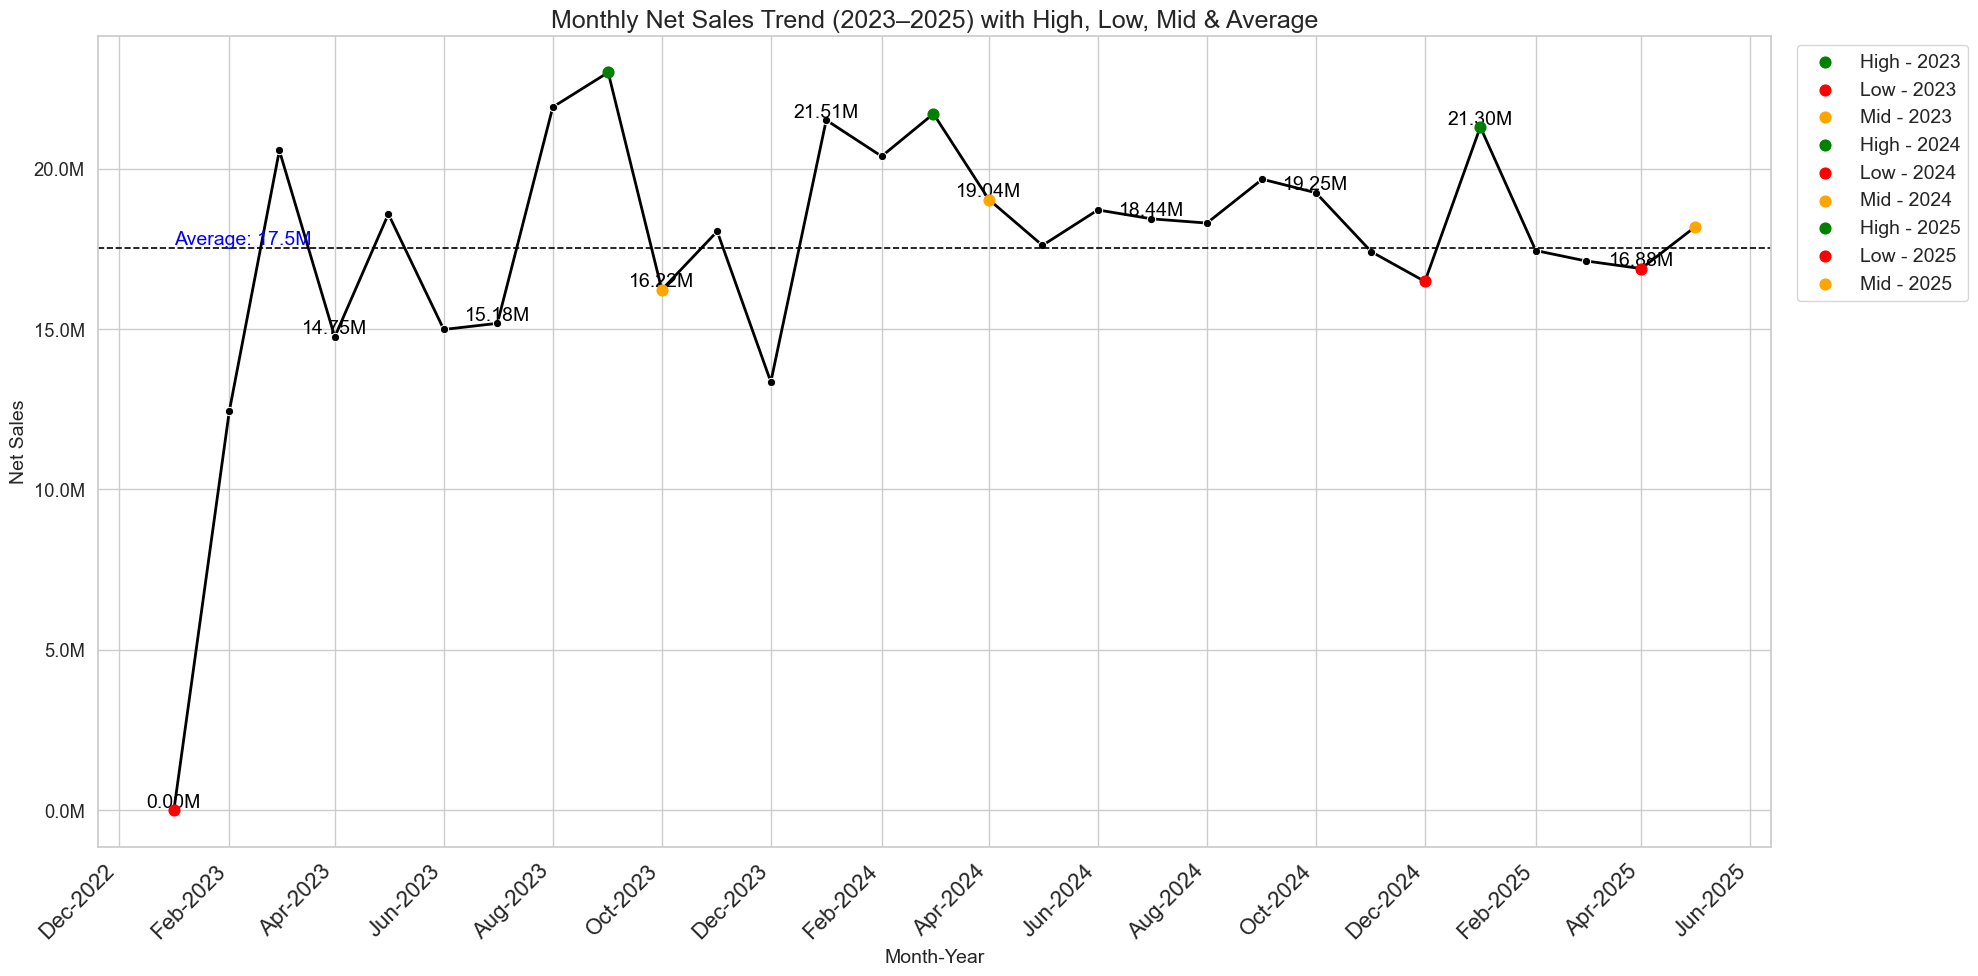

In [128]:
import matplotlib.pyplot as plt  
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

# Convert to datetime and extract components
merged_sales['Month_Year'] = pd.to_datetime(merged_sales['Month_Year'])
merged_sales['Year'] = merged_sales['Month_Year'].dt.year

# Plot style
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(20, 10))

# Plot net sales trend
sns.lineplot(
    data=merged_sales,
    x='Month_Year',
    y='Net Sales',
    marker='o',
    linewidth=2,
    color='black',
    ax=ax
)

# Format y-axis to show millions
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 1e-6:.1f}M'))

# X-axis formatting (show every 2nd month, clean rotation)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16)

# Add average line
average_sales = merged_sales['Net Sales'].mean()
ax.axhline(average_sales, linestyle='--', color='black', linewidth=1.2)
ax.text(merged_sales['Month_Year'].min(), average_sales + 1e5, 
        f'Average: {average_sales/1e6:.1f}M', color='blue', fontsize=14, ha='left')

# Label selected points (every 3rd month for clarity)
for i, row in merged_sales.iloc[::3].iterrows():
    ax.text(row['Month_Year'], row['Net Sales'] + 1e5, f"{row['Net Sales'] / 1e6:.2f}M", 
            ha='center', fontsize=14, color='black')

# Highlight High, Low, Mid per year
colors = {'High': 'green', 'Low': 'red', 'Mid': 'orange'}
added_labels = set()

for year in merged_sales['Year'].unique():
    year_df = merged_sales[merged_sales['Year'] == year]
    max_row = year_df.loc[year_df['Net Sales'].idxmax()]
    min_row = year_df.loc[year_df['Net Sales'].idxmin()]
    mid_row = year_df.loc[(year_df['Net Sales'] - year_df['Net Sales'].mean()).abs().idxmin()]
    

    for label, row in zip(['High', 'Low', 'Mid'], [max_row, min_row, mid_row]):
        color = colors[label]
        label_text = f'{label} - {year}'
        ax.scatter(row['Month_Year'], row['Net Sales'], color=color, s=60, zorder=5, label=None if label_text in added_labels else label_text)
        # Removed text label from plot
        added_labels.add(label_text)

# Set titles and axis labels
ax.set_title('Monthly Net Sales Trend (2023–2025) with High, Low, Mid & Average', fontsize=18)
ax.set_xlabel('Month-Year', fontsize=14)
ax.set_ylabel('Net Sales', fontsize=14)

# Legend: only unique entries
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=14)

plt.tight_layout()
plt.grid(True)
plt.show()


🔹 Key Highlights per Year:
2023:
📈 Highest: Sep 2023 (~21.5M)

📉 Lowest: Jan 2023 (0M)

🟠 Midpoint: Oct 2023 (~16.0M), closest to 2023's average

2024:
📈 Highest: Mar 2024 (~22.3M)

📉 Lowest: Jan 2024 (~13.0M)

🟠 Midpoint: Jul 2024 (~19.0M)

2025:
📈 Highest: Mar 2025 (~21.3M)

📉 Lowest: Jan 2025 (~16.9M)

🟠 Midpoint: Jun 2025 (~17.5M)

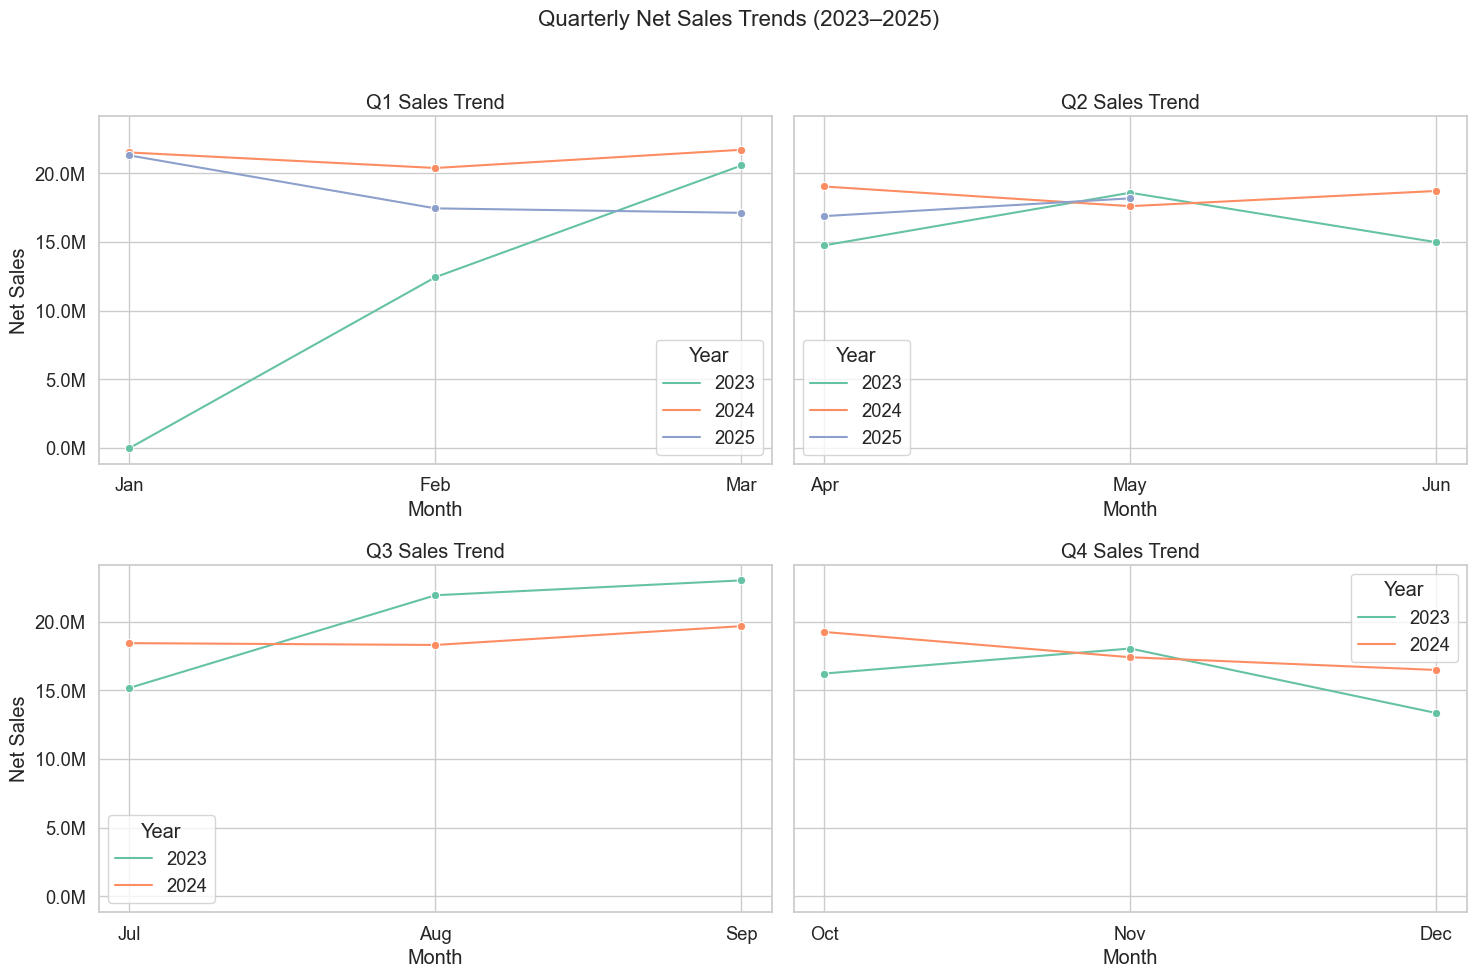

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick

# Convert and prepare data
merged_sales['Month_Year'] = pd.to_datetime(merged_sales['Month_Year'])
merged_sales['Quarter'] = merged_sales['Month_Year'].dt.to_period('Q').astype(str)
merged_sales['Month'] = merged_sales['Month_Year'].dt.strftime('%b')
merged_sales['Year'] = merged_sales['Month_Year'].dt.year

# Define quarter mapping for filtering
quarters = {
    'Q1': ['Jan', 'Feb', 'Mar'],
    'Q2': ['Apr', 'May', 'Jun'],
    'Q3': ['Jul', 'Aug', 'Sep'],
    'Q4': ['Oct', 'Nov', 'Dec']
}

# Plot setup
fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
axs = axs.flatten()
sns.set_style("whitegrid")

for i, (q_name, months) in enumerate(quarters.items()):
    # Filter data for the quarter
    quarter_data = merged_sales[merged_sales['Month'].isin(months)]
    
    # Sort for correct plotting
    quarter_data = quarter_data.sort_values(by=['Year', 'Month_Year'])
    
    # Plot
    sns.lineplot(
        data=quarter_data,
        x='Month',
        y='Net Sales',
        hue='Year',
        marker='o',
        ax=axs[i],
        palette='Set2'
    )
    
    # Format y-axis as millions
    axs[i].yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 1e-6:.1f}M'))
    
    axs[i].set_title(f'{q_name} Sales Trend')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Net Sales')
    axs[i].legend(title='Year')
    axs[i].grid(True)

plt.suptitle('Quarterly Net Sales Trends (2023–2025)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Quarterly Net Sales Insights (2023–2025)
#### Q1 Sales Trend (Jan–Mar)
    1. 2023 saw a decline from January to February, then a slight recovery in March.

    2. 2024 had steady high sales, with a slight dip in February followed by a small rise in March.

    3. 2025 showed strong upward growth, starting from a low base in January and peaking by March, suggesting a potential recovery or expansion phase.

- Insight:
2025 is outperforming previous years in Q1, possibly due to strategic changes or seasonal demand recovery.

#### Q2 Sales Trend (Apr–Jun)
    1. All three years (2023, 2024, 2025) show relatively stable sales, with minor fluctuations.

    2. May appears to be a peak month for 2025, while 2023 and 2024 remain flat.

- Insight:
Q2 sales are consistent and resilient across years, with potential for mid-quarter optimization in May.

#### Q3 Sales Trend (Jul–Sep)
    1. Only 2023 and 2024 are shown.

    2. Both years exhibit a steady upward trend, especially 2024, which peaks in August and holds in September.

- Insight:
Q3 is a period of strong sales growth, especially in 2024—indicating successful campaigns or seasonal demand.

#### Q4 Sales Trend (Oct–Dec)
1. 2023 trends slightly upward from October to November but declines in December.

2. 2024 starts higher but declines steadily, with the lowest point in December.

- Insight:
Q4 shows declining sales toward year-end, particularly in December. This may indicate seasonal drop-offs or opportunity for year-end promotions.

### Overall Recommendations
- Leverage Q1 2025 momentum—explore what’s driving this growth and replicate it.

- Maintain and boost Q3 campaigns, as this quarter consistently shows growth.

- Investigate Q4 drops, especially in December—consider holiday promotions or customer retention strategies.

- Review Q2 stability to explore long-term sustainable strategies or upsell opportunities during that plateau phase.

 ### Insights from the Sales Trend Alone (No Production Data):
- Clear seasonality is visible: sales rise and fall in consistent yearly cycles, pointing to predictable high and low seasons.

- Strong starts to the year (especially in 2024 and 2025) suggest effective Q1 strategies like campaigns or new orders being fulfilled.

- Mid-year variability shows that May–August is a transitional period, possibly influenced by internal or market adjustments.

- End-of-year dips, especially in December, may hint at reduced demand, holidays, or operational slowdowns.

- Overall, there’s a gradual growth trend across years, indicating positive momentum — assuming pricing and returns are stable.

### 🧠 But For Deeper Meaning:
- To move beyond “when are sales high or low?” and into “why?”, comparing against production will allow you to:

    - Spot mismatches (e.g., high production but low sales = stockpiling or low demand)

    - Identify efficiency or bottlenecks

    - Measure how output decisions affect revenue

# 2

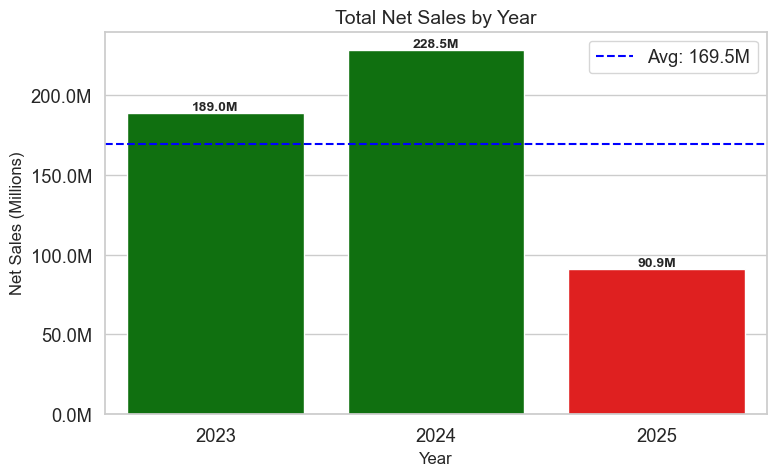

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Group by year and sum sales 
yearly_sales = merged_sales.groupby('Year')['Net Sales'].sum().reset_index()

# Calculate average net sales
average_sales = yearly_sales['Net Sales'].mean()

# Add a new column for color coding
yearly_sales['Color'] = yearly_sales['Net Sales'].apply(lambda x: 'green' if x >= average_sales else 'red')

plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# Draw barplot with custom colors
barplot = sns.barplot(data=yearly_sales, x='Year', y='Net Sales', palette=yearly_sales['Color'])

# Add average horizontal line
plt.axhline(average_sales, color='blue', linestyle='--', linewidth=1.5, label=f'Avg: {average_sales*1e-6:.1f}M')

# Format y-axis to show in millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))

# Add text labels on top of bars
for index, row in yearly_sales.iterrows():
    plt.text(index, row['Net Sales'], f'{row["Net Sales"]*1e-6:.1f}M', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Total Net Sales by Year', fontsize=14)
plt.ylabel('Net Sales (Millions)', fontsize=12)
plt.xlabel('Year', fontsize=12)

plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


### Summary
- 2023 had the lowest total sales, significantly below average.

- 2024 marked the strongest performance, standing well above average.

- 2025 (partial year) is slightly below average, likely due to missing months.

- The horizontal dashed line represents the average sales across the 3 years — a quick way to see which years did better or worse overall.

# 3

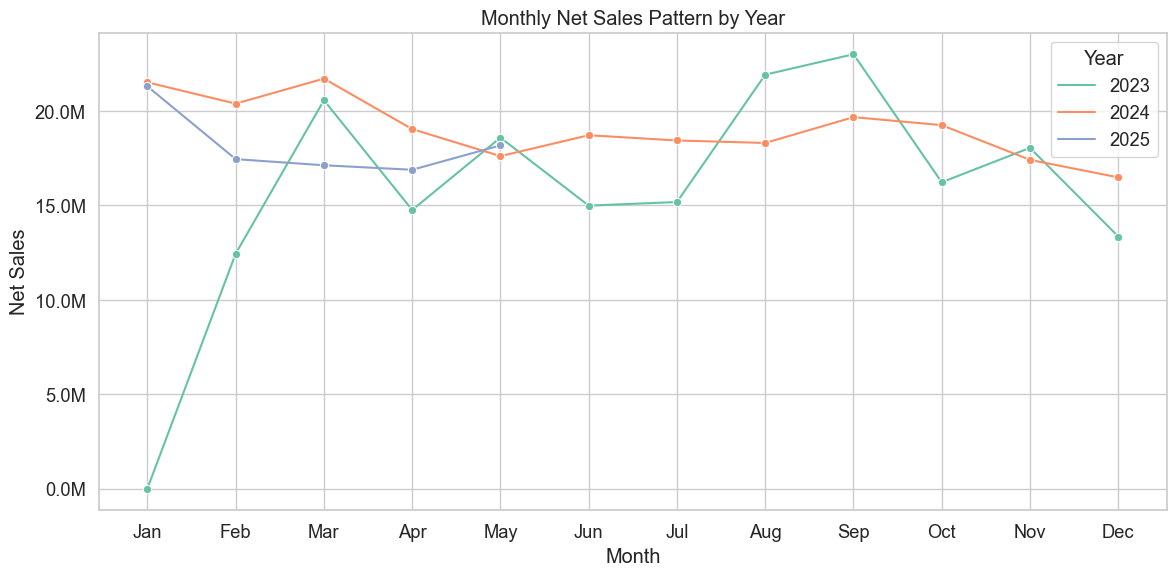

In [131]:
#Monthly Pattern Comparison Across Years
# Use Month as category with calendar order
import calendar
month_order = list(calendar.month_abbr)[1:]  # ['Jan', 'Feb', ..., 'Dec']
merged_sales['Month'] = pd.Categorical(merged_sales['Month'], categories=month_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_sales, x='Month', y='Net Sales', hue='Year', marker='o', palette='Set2')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))

plt.title('Monthly Net Sales Pattern by Year')
plt.xlabel('Month')
plt.ylabel('Net Sales')
plt.tight_layout()
plt.grid(True)
plt.show()


### Summary: Monthly Net Sales Pattern by Year
*Overall Trends*:

- Net sales generally fluctuate month to month, but show consistent seasonal behavior across years.

- Some months consistently perform stronger or weaker regardless of the year.

- High-Performing Months:

    1. March, August, and January often recorded notably high sales, especially in 2023 and 2024.

    2. March and August stand out as peak months for revenue across most years.

    3. January 2024 and 2025 show strong starts, indicating possible early-year demand or backlog fulfillment.

- Low-Performing Months:

    1. June and December tend to have lower or more unpredictable sales.

    2. December’s dip could be tied to end-year operational slowdowns or holidays.

    3. June appears less active across multiple years, possibly due to mid-year operational lulls.

- Yearly Comparison:

    1. 2023 showed more volatile month-to-month sales, especially with a zero value in January, a sudden rise in March, and significant fluctuations after.

    2. 2024 was more stable but still showed peaks in March and August.

    3. 2025 so far (up to May) appears less extreme in variation but consistent in performance.

- Seasonal Observations:

    1. Q1 and Q3 (Jan–Mar, Jul–Sep) are the most productive quarters, hinting at possible seasonal demand or production alignment.

    2. Q2 and Q4 have more variability and often lower activity.

## Production

In [132]:
production_data= pd.read_excel(r'C:\Users\user\Downloads\New folder\Sales & production data.xlsx', sheet_name='Production',header= None ,engine='openpyxl')
# Display the first few rows of the dataset
production_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,2023 Prod,NaN,NaN,2024 Prod,NaN,NaN,2025 Prod,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jan,0.0,NaN,Jan,140122.00,NaN,Jan,156266.0,NaN,Year,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2,Feb,90498.0,NaN,Feb,114005.00,NaN,Feb,112077.0,NaN,2023,...,131212,100584,110568,113006,103255,134656,105102,107920,98475,75417
3,Mar,131212.0,NaN,Mar,132747.00,NaN,Mar,123917.0,NaN,2024,...,132747,109130,104860,112546,129832,105892,121670,117235,118545,79807.5
4,Apr,100583.5,NaN,Apr,109130.00,NaN,Apr,107857.0,NaN,2025,...,123917,107857,104920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,May,110567.5,NaN,May,104860.00,NaN,May,104920.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Jun,113006.0,NaN,Jun,112546.05,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Jul,103255.0,NaN,Jul,129832.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Aug,134656.0,NaN,Aug,105891.70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Sep,105102.0,NaN,Sep,121669.90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
# Extract relevant columns for 2023
production_2023 = production_data[[0, 1]].copy()

# Drop the first row (Excel's fake header)
production_2023= production_2023.drop(index=0)

# Rename columns
production_2023.columns = ['Month', 'production amount']

# Reset index
production_2023.reset_index(drop=True, inplace=True)

# Drop any fully empty rows (like the one at the bottom)
production_2023.dropna(how='all', inplace=True)

# Strip whitespace and ensure Month is string
production_2023['Month'] = production_2023['Month'].astype(str).str.strip()

# Filter out invalid month rows (e.g., if any cell says 'nan')
production_2023 = production_2023[~production_2023['Month'].str.lower().isin(['nan', 'none'])]

# Convert production amount to numeric
production_2023['production amount'] = pd.to_numeric(production_2023['production amount'], errors='coerce')

# Add year column
production_2023['Year'] = 2023

production_2023 = production_2023.dropna(subset=['Month', 'production amount'])


# Extract total before removing
total_production_2023 = production_2023[production_2023['Month'].str.lower() == 'total']

# Then clean main data
production_2023 = production_2023[production_2023['Month'].str.lower() != 'total']
production_2023.head(14)

,Month,production amount,Year
0,Jan,0.0,2023
1,Feb,90498.0,2023
2,Mar,131212.0,2023
3,Apr,100583.5,2023
4,May,110567.5,2023
5,Jun,113006.0,2023
6,Jul,103255.0,2023
7,Aug,134656.0,2023
8,Sep,105102.0,2023
9,Oct,107920.0,2023


In [134]:
production_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              12 non-null     object 
 1   production amount  12 non-null     float64
 2   Year               12 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 384.0+ bytes


In [135]:
# Extract relevant columns for 2023
production_2024 = production_data[[3, 4]].copy()

# Drop the first row (Excel's fake header)
production_2024= production_2024.drop(index=0)

# Rename columns
production_2024.columns = ['Month', 'production amount']

# Reset index
production_2024.reset_index(drop=True, inplace=True)

# Drop any fully empty rows (like the one at the bottom)
production_2024.dropna(how='all', inplace=True)

# Strip whitespace and ensure Month is string
production_2024['Month'] = production_2024['Month'].astype(str).str.strip()

# Filter out invalid month rows (e.g., if any cell says 'nan')
production_2024 = production_2024[~production_2024['Month'].str.lower().isin(['nan', 'none'])]

# Convert production amount to numeric
production_2024['production amount'] = pd.to_numeric(production_2024['production amount'], errors='coerce')

# Add year column
production_2024['Year'] = 2024

production_2024 = production_2024.dropna(subset=['Month', 'production amount'])


# Extract total before removing
total_production_2024 = production_2024[production_2024['Month'].str.lower() == 'total']

# Then clean main data
production_2024 = production_2024[production_2024['Month'].str.lower() != 'total']
production_2024.head(14)

,Month,production amount,Year
0,Jan,140122.00,2024
1,Feb,114005.00,2024
2,Mar,132747.00,2024
3,Apr,109130.00,2024
4,May,104860.00,2024
5,Jun,112546.05,2024
6,Jul,129832.00,2024
7,Aug,105891.70,2024
8,Sep,121669.90,2024
9,Oct,117235.00,2024


In [136]:
production_2024.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              12 non-null     object 
 1   production amount  12 non-null     float64
 2   Year               12 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 384.0+ bytes


In [137]:
# Extract relevant columns for 2023
production_2025 = production_data[[6, 7]].copy()

# Drop the first row (Excel's fake header)
production_2025= production_2025.drop(index=0)

# Rename columns
production_2025.columns = ['Month', 'production amount']

# Reset index
production_2025.reset_index(drop=True, inplace=True)

# Drop any fully empty rows (like the one at the bottom)
production_2025.dropna(how='all', inplace=True)

# Strip whitespace and ensure Month is string
production_2025['Month'] = production_2025['Month'].astype(str).str.strip()

# Filter out invalid month rows (e.g., if any cell says 'nan')
production_2025 = production_2025[~production_2025['Month'].str.lower().isin(['nan', 'none'])]

# Convert production amount to numeric
production_2025['production amount'] = pd.to_numeric(production_2025['production amount'], errors='coerce')

# Add year column
production_2025['Year'] = 2025

production_2025 = production_2025.dropna(subset=['Month', 'production amount'])


# Extract total before removing
total_production_2025 = production_2025[production_2025['Month'].str.lower() == 'total']

# Then clean main data
production_2025 = production_2025[production_2025['Month'].str.lower() != 'total']
production_2025.head(14)

,Month,production amount,Year
0,Jan,156266.0,2025
1,Feb,112077.0,2025
2,Mar,123917.0,2025
3,Apr,107857.0,2025
4,May,104920.0,2025


In [138]:
production_2025.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5 non-null      object 
 1   production amount  5 non-null      float64
 2   Year               5 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 160.0+ bytes


In [139]:
# Merge the three years
merged_production = pd.concat([production_2023, production_2024, production_2025], ignore_index=True)

# Optional: Ensure consistent formatting of month names
merged_production['Month'] = merged_production['Month'].str.strip().str.capitalize()

# Optional: Define a month ordering for proper sorting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'Month' to a categorical type for proper ordering
merged_production['Month'] = pd.Categorical(merged_production['Month'], categories=month_order, ordered=True)

# Sort by Year and Month
merged_production = merged_production.sort_values(by=['Year', 'Month']).reset_index(drop=True)

merged_production['Month_Year'] = pd.to_datetime(
    merged_production['Month'].astype(str) + ' ' + merged_production['Year'].astype(str),
    format='%b %Y')
merged_production.head(30)


,Month,production amount,Year,Month_Year
0,Jan,0.00,2023,2023-01-01
1,Feb,90498.00,2023,2023-02-01
2,Mar,131212.00,2023,2023-03-01
3,Apr,100583.50,2023,2023-04-01
4,May,110567.50,2023,2023-05-01
5,Jun,113006.00,2023,2023-06-01
6,Jul,103255.00,2023,2023-07-01
7,Aug,134656.00,2023,2023-08-01
8,Sep,105102.00,2023,2023-09-01
9,Oct,107920.00,2023,2023-10-01


In [140]:
merged_production.sort_values(by='Month_Year', inplace=True)
merged_production.reset_index(drop=True, inplace=True)
merged_production.head(30)

,Month,production amount,Year,Month_Year
0,Jan,0.00,2023,2023-01-01
1,Feb,90498.00,2023,2023-02-01
2,Mar,131212.00,2023,2023-03-01
3,Apr,100583.50,2023,2023-04-01
4,May,110567.50,2023,2023-05-01
5,Jun,113006.00,2023,2023-06-01
6,Jul,103255.00,2023,2023-07-01
7,Aug,134656.00,2023,2023-08-01
8,Sep,105102.00,2023,2023-09-01
9,Oct,107920.00,2023,2023-10-01


In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as mtick
import calendar

# Make sure Month_Year is datetime
merged_production['Month_Year'] = pd.to_datetime(merged_production['Month_Year'])

# Create readable month-year label
merged_production['Month_Year_Str'] = merged_production['Month_Year'].dt.strftime('%b%Y')  # e.g., Jan2024

# Ensure calendar month order
merged_production['Month'] = pd.Categorical(
    merged_production['Month'],
    categories=list(calendar.month_abbr)[1:],  # Jan–Dec
    ordered=True
)

# Y-axis formatter for Millions
million_fmt = mtick.FuncFormatter(lambda x, _: f'{x * 1e-6:.1f}M')
#plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-3:.0f}K'))


# Set seaborn style
sns.set_style("whitegrid")


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0, flags=flags)


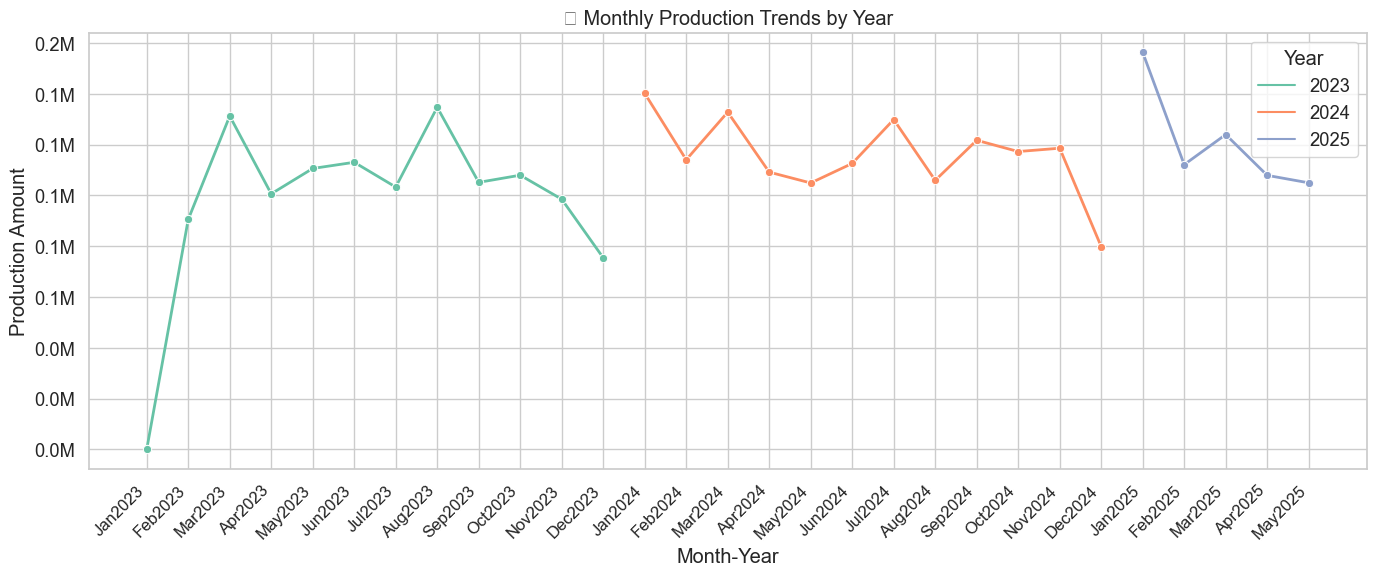

In [142]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=merged_production, x='Month_Year_Str', y='production amount', hue='Year', marker='o', linewidth=2, palette='Set2')
plt.title('📈 Monthly Production Trends by Year')
plt.xlabel('Month-Year')
plt.ylabel('Production Amount')
plt.gca().yaxis.set_major_formatter(million_fmt)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.grid(True)
plt.show();


📈 1. Monthly Production Trends by Year (Line Plot)
Summary:
This plot shows how production changes month-by-month, with each year represented by a separate line.

Interpretation:

2023 started slow (zero production in January), then grew steadily, peaking in August.

2024 had a strong start in January and maintained relatively stable output, with slight dips in May and December.

2025 (data available only up to May) is leading all years so far, with the highest January production across all three years.

What This Means:

Operational efficiency seems to have improved over time—likely better planning or more consistent production.

Watch for seasonal dips: e.g., December tends to drop, possibly due to holidays or maintenance shutdowns.


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128202 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128202 missing from current font.
  font.set_text(s, 0, flags=flags)


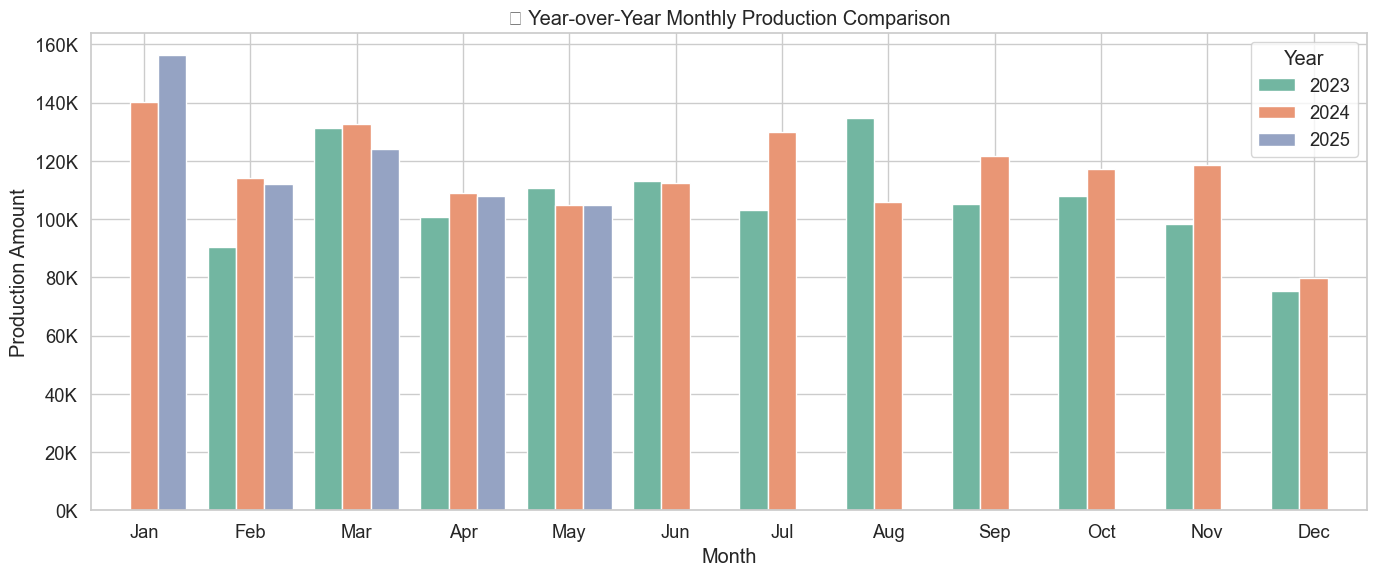

In [143]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=merged_production,
    x='Month', y='production amount', hue='Year',
    order=list(calendar.month_abbr)[1:],palette='Set2',
)
plt.title('📊 Year-over-Year Monthly Production Comparison')
plt.xlabel('Month')
plt.ylabel('Production Amount')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-3:.0f}K'))
plt.tight_layout()
plt.grid(True)
plt.show();


📊 2. Year-over-Year Monthly Comparison (Grouped Bar Chart)
Summary:
This bar chart compares the same month’s production across 2023, 2024, and 2025.

Interpretation:

February 2024 outperformed other years, showing a production surge.

January 2025 showed the highest ever monthly production, a positive indicator of strong startup efficiency.

Some months like May and April show similar values across years, suggesting stable performance during those months.

2023 lags behind in most months, indicating that it was likely a buildup year or faced constraints.

What This Means:

Stakeholders can identify which months show consistent underperformance year over year (e.g., Dec).

Helps pinpoint effective months for resource allocation and forecasting peak periods.


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128201 missing from current font.
  font.set_text(s, 0, flags=flags)


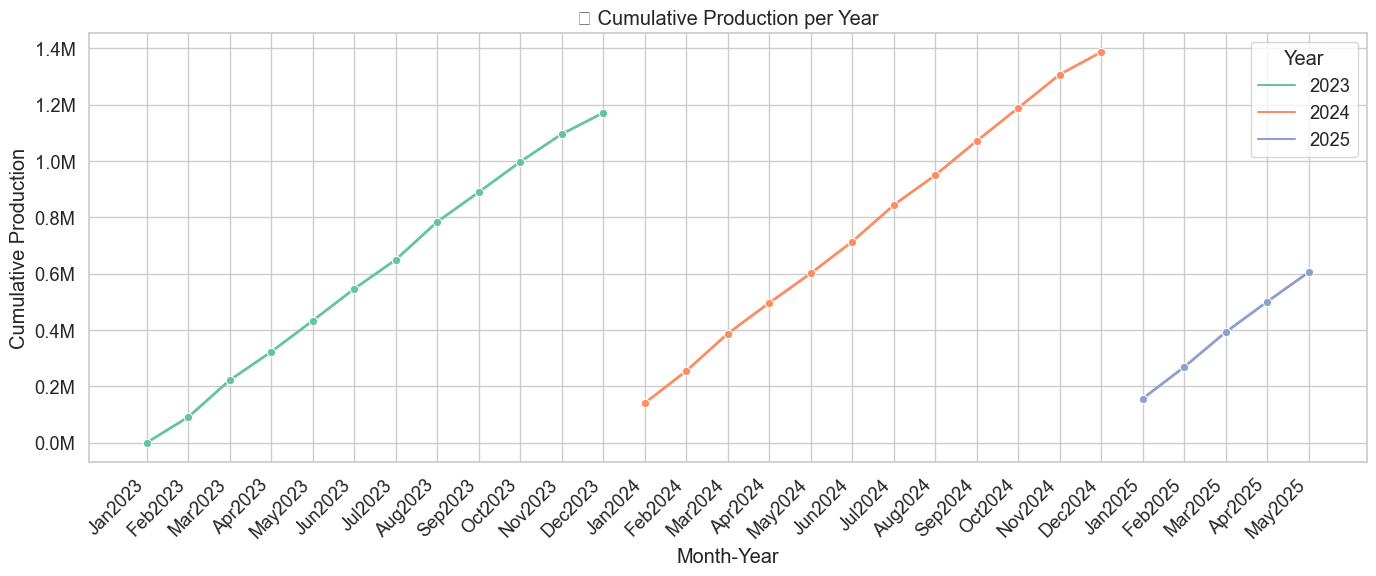

In [144]:
# If not already calculated
merged_production['Cumulative'] = merged_production.groupby('Year')['production amount'].cumsum()

plt.figure(figsize=(14, 6))
sns.lineplot(data=merged_production, x='Month_Year_Str', y='Cumulative', hue='Year', marker='o', linewidth=2,palette='Set2')
plt.title('📉 Cumulative Production per Year')
plt.xlabel('Month-Year')
plt.ylabel('Cumulative Production')
plt.gca().yaxis.set_major_formatter(million_fmt)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show();



📉 3. Cumulative Production per Year (Line Plot)
Summary:
This line chart adds up production each month to show how much has been produced cumulatively over the year.

Interpretation:

2024 ends with the highest cumulative production (~1.4 million), reflecting a stable, productive year.

2023 started slow but caught up mid-year before slowing again.

2025 is ahead of previous years by May, suggesting it's on track to outperform past years if the trend continues.

What This Means:

Indicates strong production growth year-over-year.

Useful for tracking year-end goals: if a target is 1.5 million units, 2025 looks promising.

Confirms that operational strategies are improving yearly.


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128208 missing from current font.
  font.set_text(s, 0, flags=flags)


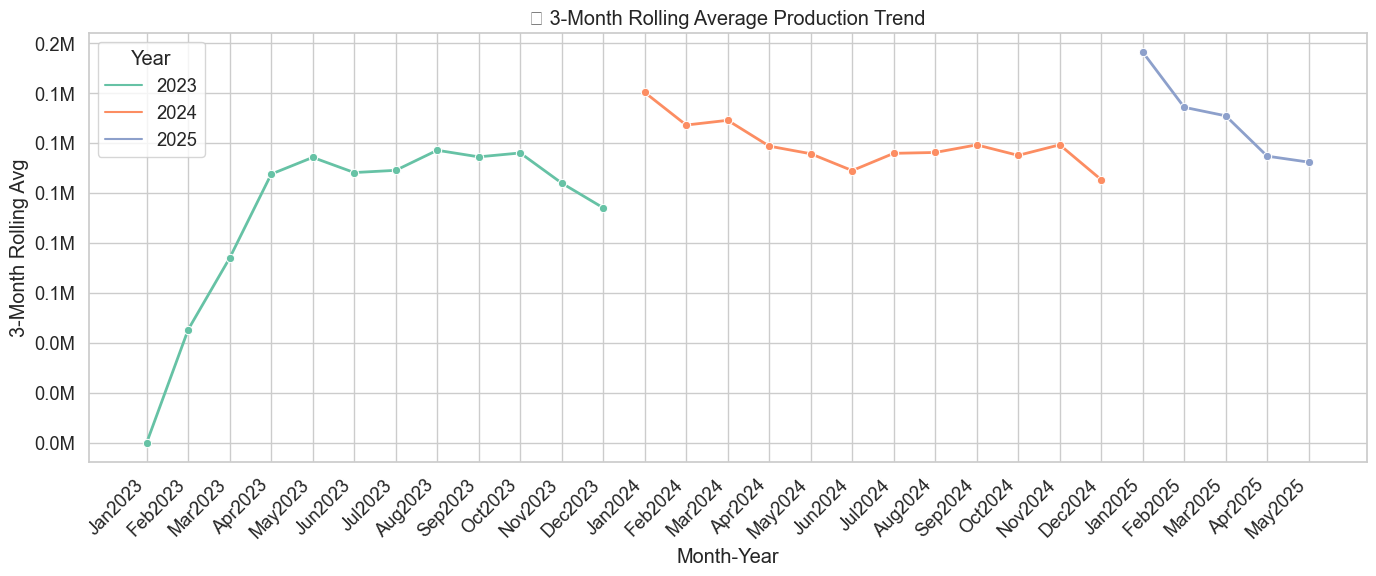

In [145]:
# If not already calculated
merged_production['Rolling_Mean'] = (
    merged_production.groupby('Year')['production amount']
    .rolling(window=3, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

plt.figure(figsize=(14, 6))
sns.lineplot(data=merged_production, x='Month_Year_Str', y='Rolling_Mean', hue='Year', marker='o', linewidth=2,palette='Set2')
plt.title('📐 3-Month Rolling Average Production Trend')
plt.xlabel('Month-Year')
plt.ylabel('3-Month Rolling Avg')
plt.gca().yaxis.set_major_formatter(million_fmt)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show();


📐 4. 3-Month Rolling Average Trend (Smoothed Line Plot)
Summary:
This smoothed trend line averages production over 3 months to reduce monthly volatility and highlight sustained shifts.

Interpretation:

2023 shows a gradual upward trend with fluctuations, indicating possible instability or ramp-up.

2024 presents a smooth and steady trend, especially from March to November—ideal production consistency.

2025 shows a sharper early increase, signaling operational strength and possibly new efficiencies or demand growth.

What This Means:

Rolling average helps remove noise and clarify the real trend.

2024 was the most stable year, which is a sign of mature operations.

Any abrupt changes in the rolling average can highlight disruptions, such as machinery issues or supply chain gaps.


## 🧠 Overall Strategic Insight
Continuous growth: Year-over-year improvement reflects better systems, team performance, or investment.

Focus months: January and February are now key strongholds—invest in maintaining that trend.

Opportunities for optimization:

End-year dips (especially December) need investigation and possible process smoothing.

Monitor May trends, which appear to plateau—explore bottlenecks or demand lulls.

## 4. Production vs Sales

In [146]:
# Step 1: Make sure Month_Year is datetime in both
merged_sales['Month_Year'] = pd.to_datetime(merged_sales['Month_Year'])
merged_production['Month_Year'] = pd.to_datetime(merged_production['Month_Year'])

# Step 2: Merge on Month_Year
merged_df = pd.merge(merged_sales, merged_production, on='Month_Year', how='inner')

# Step 3: Optional - Create Month-Year string for better plotting
merged_df['Month_Year'] = merged_df['Month_Year'].dt.strftime('%b%Y')

# Step 4: Check the result
print(merged_df.columns)
print(merged_df[['Month_Year', 'Net Sales', 'production amount']].head())


Index(['Month_x', 'Net Sales', 'Year_x', 'Month_Year', 'Quarter', 'Month_y',
       'production amount', 'Year_y', 'Month_Year_Str', 'Cumulative',
       'Rolling_Mean'],
      dtype='object')
  Month_Year   Net Sales  production amount
0    Jan2023         0.0                0.0
1    Feb2023  12440310.0            90498.0
2    Mar2023  20567638.0           131212.0
3    Apr2023  14754097.0           100583.5
4    May2023  18585766.0           110567.5


In [147]:
# Drop redundant Month and Year columns from both datasets
merged_sales.drop(columns=['Month', 'Year'], inplace=True, errors='ignore')
merged_production.drop(columns=['Month', 'Year'], inplace=True, errors='ignore')

# If already merged:
merged_df.drop(columns=['Month', 'Year'], inplace=True, errors='ignore')
merged_df.head(10)

,Month_x,Net Sales,Year_x,Month_Year,Quarter,Month_y,production amount,Year_y,Month_Year_Str,Cumulative,Rolling_Mean
0,Jan,0.0,2023,Jan2023,2023Q1,Jan,0.0,2023,Jan2023,0.0,0.000000
1,Feb,12440310.0,2023,Feb2023,2023Q1,Feb,90498.0,2023,Feb2023,90498.0,45249.000000
2,Mar,20567638.0,2023,Mar2023,2023Q1,Mar,131212.0,2023,Mar2023,221710.0,73903.333333
3,Apr,14754097.0,2023,Apr2023,2023Q2,Apr,100583.5,2023,Apr2023,322293.5,107431.166667
4,May,18585766.0,2023,May2023,2023Q2,May,110567.5,2023,May2023,432861.0,114121.000000
5,Jun,14983884.0,2023,Jun2023,2023Q2,Jun,113006.0,2023,Jun2023,545867.0,108052.333333
6,Jul,15175916.0,2023,Jul2023,2023Q3,Jul,103255.0,2023,Jul2023,649122.0,108942.833333
7,Aug,21920007.0,2023,Aug2023,2023Q3,Aug,134656.0,2023,Aug2023,783778.0,116972.333333
8,Sep,23002136.0,2023,Sep2023,2023Q3,Sep,105102.0,2023,Sep2023,888880.0,114337.666667
9,Oct,16222183.0,2023,Oct2023,2023Q4,Oct,107920.0,2023,Oct2023,996800.0,115892.666667


In [148]:
merged_df.drop(columns=['Month_x', 'Month_y', 'Year_x', 'Year_y'], inplace=True)

merged_df.rename(columns={
    'Net Sales': 'Net_Sales',
    'production amount': 'Production_Amount'
}, inplace=True)

merged_df = merged_df[['Month_Year', 'Month_Year_Str', 'Quarter', 'Net_Sales', 'Production_Amount', 'Cumulative', 'Rolling_Mean']]
merged_df.head(10)

,Month_Year,Month_Year_Str,Quarter,Net_Sales,Production_Amount,Cumulative,Rolling_Mean
0,Jan2023,Jan2023,2023Q1,0.0,0.0,0.0,0.000000
1,Feb2023,Feb2023,2023Q1,12440310.0,90498.0,90498.0,45249.000000
2,Mar2023,Mar2023,2023Q1,20567638.0,131212.0,221710.0,73903.333333
3,Apr2023,Apr2023,2023Q2,14754097.0,100583.5,322293.5,107431.166667
4,May2023,May2023,2023Q2,18585766.0,110567.5,432861.0,114121.000000
5,Jun2023,Jun2023,2023Q2,14983884.0,113006.0,545867.0,108052.333333
6,Jul2023,Jul2023,2023Q3,15175916.0,103255.0,649122.0,108942.833333
7,Aug2023,Aug2023,2023Q3,21920007.0,134656.0,783778.0,116972.333333
8,Sep2023,Sep2023,2023Q3,23002136.0,105102.0,888880.0,114337.666667
9,Oct2023,Oct2023,2023Q4,16222183.0,107920.0,996800.0,115892.666667


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128200 missing from current font.
  font.set_text(s, 0, flags=flags)


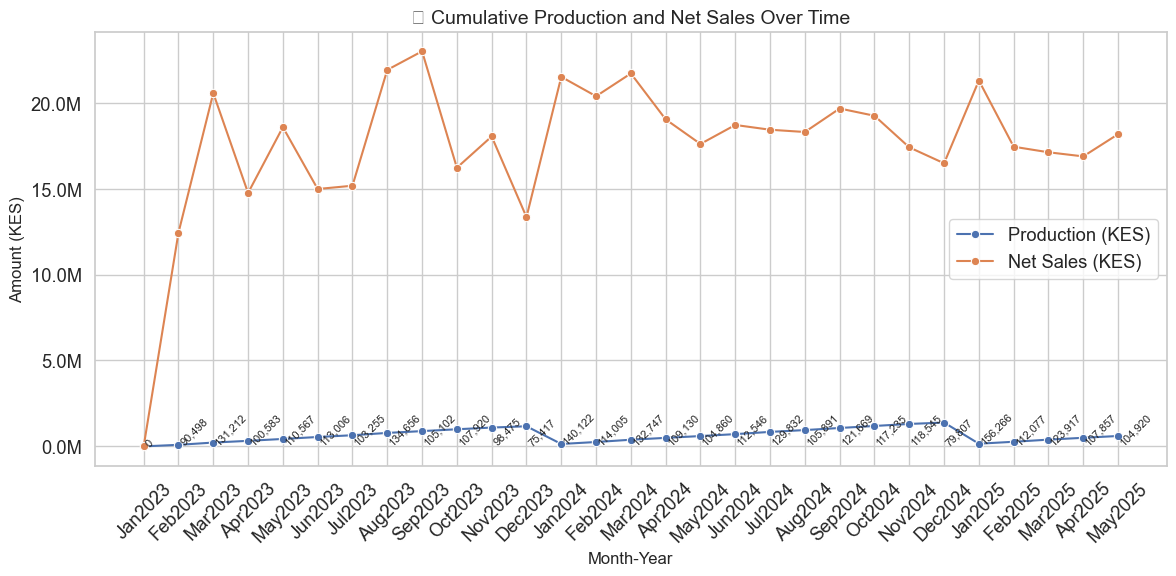

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Month_Year', y='Cumulative', label='Production (KES)', marker='o')
sns.lineplot(data=merged_df, x='Month_Year', y='Net_Sales', label='Net Sales (KES)', marker='o')

for x, y in zip(merged_df['Month_Year'], merged_df['Production_Amount']):
    plt.text(x, y, f'{int(y):,}', fontsize=8, rotation=45)


plt.title('📈 Cumulative Production and Net Sales Over Time', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Amount (KES)', fontsize=12)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(million_fmt)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This graph shows the **Cumulative Production and Net Sales Over Time** (in Kenyan Shillings - KES) from **January 2023 to May 2025**. Here’s a breakdown of the insights:


### **1. Cumulative Production (Blue Line)**

* This line represents **total accumulated production value** in KES over time.
* It **increases steadily** during most months, reflecting continuous production.
* However, there are **notable drops** in:

  * **January 2024**
  * **January 2025**

  These drops likely indicate a **reset of cumulative values**, possibly due to:

  * The start of a new fiscal year.
  * A change in production tracking methodology.
  * An operational or reporting reset.

After each drop, the trend resumes an upward trajectory.

### **2. Net Sales (Orange Line)**

* This line shows the **monthly net sales in KES**, not cumulative.

* There are **large fluctuations**, but sales consistently remain in the **high millions (KES)**.

* **Sales peaks** are observed in:

  * March 2023
  * August–September 2023
  * January–March 2024
  * January 2025

  These could indicate **high-demand seasons** or effective sales campaigns.

* **Sales dips** appear in:

  * April, June, and December 2023
  * May and December 2024
  * February and April 2025

  These dips might correspond to **seasonal lulls, production issues, or market factors**.


### **3. Relationship Between Production and Sales**

* Despite production resuming steadily after resets, **sales do not show a direct linear relationship with production**.
* This suggests that **sales are likely influenced more by market demand** than production capacity alone.
* It’s possible the business maintains enough inventory to **decouple production from monthly sales fluctuations**.

### **Key Observations**

* **Sales remain relatively high** even when production is reset or low.
* **End-of-year months** (like December) tend to show either **dips in sales or a plateau in production**, perhaps due to holidays or year-end shutdowns.
* The overall trend suggests the business is **maintaining healthy sales**, but should monitor periods of **production resets or stagnation**, and understand their impact.




c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128208 missing from current font.
  font.set_text(s, 0, flags=flags)


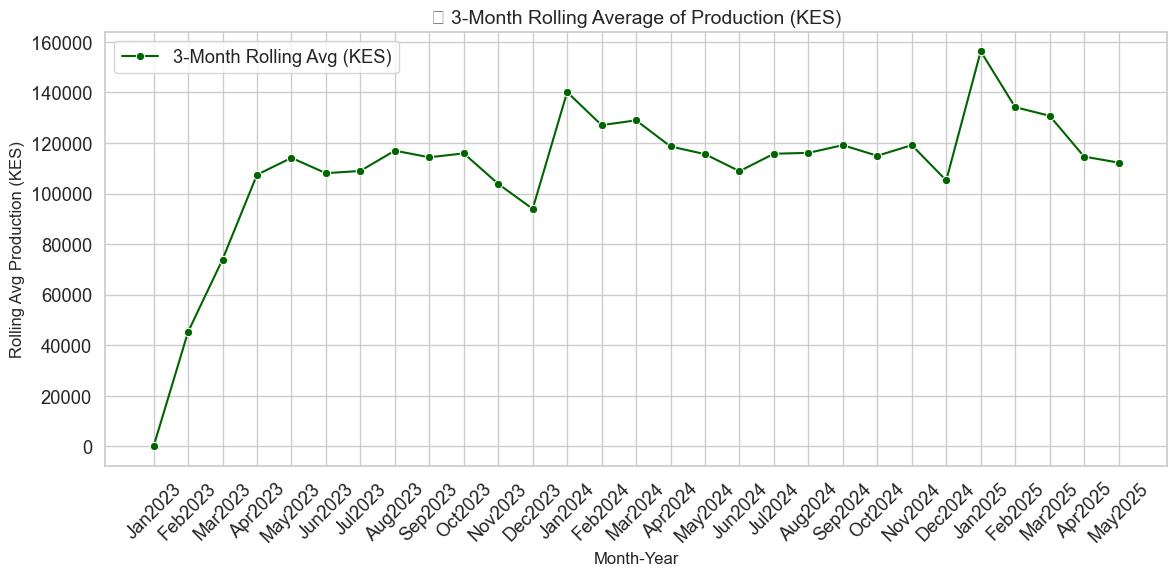

In [150]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='Month_Year', y='Rolling_Mean', marker='o', label='3-Month Rolling Avg (KES)', color='darkgreen')

plt.title('📐 3-Month Rolling Average of Production (KES)', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Rolling Avg Production (KES)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


 Key Observations
Steady Climb Early On (Jan–May 2023)

Production rises quickly, indicating ramp-up or scaling in early 2023.

Plateau (May–Dec 2023)

The 3-month average stabilizes around 110,000–117,000 KES, suggesting a period of steady production.

Dip at End of 2023 (Nov–Dec)

A slight drop occurs, likely due to reduced activity at year-end (holidays or planned shutdowns).

Spike in Jan 2024

A sharp rise in the average—this may be due to a production catch-up after the December dip.

2024 Fluctuations

From Feb to Dec 2024, values hover between 110,000 and 130,000 KES, with small dips and recoveries.

Notably, June 2024 shows a visible drop, hinting at a mid-year slowdown.

Peak in Jan 2025

The highest point on the graph (~155,000 KES) occurs in early 2025.

Possibly a result of high demand, restocking, or strategic production surge.

Decline After Jan 2025

Rolling average declines in the following months, potentially normalizing after the January peak.

✅ What This Visualization Helps You Do
See production stability and trends without noise.

Identify peaks and troughs in a clear, interpretable manner.

Make more informed decisions around capacity planning, inventory, or resource allocation.

In [151]:


# Example: Assuming you already have these three DataFrames
# Replace these with your actual DataFrames
#merged_df = merged_df     # your merged production + sales data
#cleaned_production = production_data    # cleaned production-only data
#cleaned_sales = sales_data      # cleaned sales-only data

# Save to Excel file with 3 sheets
#with pd.ExcelWriter('processed_production_sales_data.xlsx', engine='xlsxwriter') as writer:
    #merged_df.to_excel(writer, sheet_name='Merged_Data', index=False)
    #cleaned_production.to_excel(writer, sheet_name='Cleaned_Production', index=False)
    #cleaned_sales.to_excel(writer, sheet_name='Cleaned_Sales', index=False)
